In [2]:
# load the module
%load_ext autoreload
%autoreload 2

import Generating_Problems as Generator
import numpy as np
import matplotlib.pyplot as plt
import RQAOA
import networkx as nx
from QIRO_MIS import QIRO
from classical_solver import find_mis
import classical_benchmarks.Simulated_Annealing as SA
import classical_benchmarks.Parallel_Tempering as PT
import classical_benchmarks.greedy_mis as GM

In [3]:
def experiment_setup(no_graph,min_node,max_node,step_node,no_sample,radius = 0.4,alpha_value = 1.1,nc = 4, no_correlation = 5,temperature = 7):
    """
    This function is used to setup experiment and obtain the result 
    Input:
    - no_graph: The number of graph we want to test per setup 
    - min_node: The minimum number of nodes we want to test 
    - max_node: The maximum number of nodes we want to test 
    - step_node: The number of point we want to use in linspace(min_node,max_node,step_node)
    - no_sample: Number of run using QIRO per graph per setup 
    - strategy: The strategt we will use in QIRO, default is Bolztmann 
    - nc: The critical number of node 
    - no_correlation: maximum number of correlation terms we simplify at each iteration in QIRO
    - temperature: The pseudo-temperature in the Bolztmann strategy 
    """
    
    node_array = np.linspace(min_node,max_node,step_node)
    efficiency_array_Bolztmann = np.zeros((step_node,no_graph,no_sample))
    efficiency_array_Max = np.zeros((step_node,no_graph,no_sample))
    for node_index in range(len(node_array)):
        no_node = int(node_array[node_index])
        for graph_index in range(no_graph): 
            # Setting up the graph and problem
            print(f"Node {no_node},Graph {graph_index}")
            graph = nx.random_geometric_graph(no_node, radius)
            problem = Generator.MIS(graph,alpha = alpha_value)
            # Obtain heuristic solution
            heuristic_solution = GM.greedy_mis(graph)
            # Set up QIRO run 
            for sample_index in range(no_sample):
                qiro_Bolztmann = QIRO(problem,nc,'Soft_Max',no_correlation,temperature)
                qiro_Max = QIRO(problem,nc,'Max',no_correlation,temperature)
                qiro_Bolztmann.execute()
                qiro_Max.execute()
                qiro_number_of_violations_Bolztmann, qiro_size_of_set_Bolztmann = problem.evaluate_solution(qiro_Bolztmann.solution)
                qiro_number_of_violations_Max, qiro_size_of_set_Max = problem.evaluate_solution(qiro_Max.solution)
                if qiro_number_of_violations_Bolztmann == 0:
                    efficiency_array_Bolztmann[node_index,graph_index,sample_index] = qiro_size_of_set_Bolztmann/heuristic_solution
                if qiro_number_of_violations_Max == 0:
                    efficiency_array_Max[node_index,graph_index,sample_index] = qiro_size_of_set_Max/heuristic_solution
                    
    return efficiency_array_Bolztmann,efficiency_array_Max

#### Comparison run 1 
We compare between max and bolztmann strategy for 20 random graph with 40 nodes. For each node, we sample 10 times. We use low temperature T = 3. No_correlation = 4. 

In [5]:
comparison_run_B_1, comparison_run_M_1 = experiment_setup(no_graph = 20,min_node = 40,max_node = 40, step_node = 1, no_sample = 10,temperature = 3)

Node 40,Graph 0


C:\Users\PhamNguyenTa\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\PhamNguyenTa\AppData\Local\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19


In [6]:
np.save('comparison_run_B_1',comparison_run_B_1)
np.save('comparison_run_M_1',comparison_run_M_1)

In [9]:
B1_data = comparison_run_B_1[0,:,:]
M1_data = comparison_run_M_1[0,:,:]

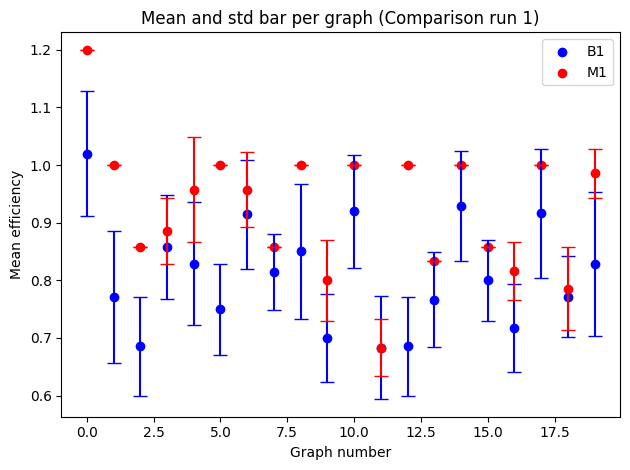

In [13]:
mean_B1 = np.mean(B1_data,axis=1)
std_B1 = np.std(B1_data,axis=1)

mean_M1 = np.mean(M1_data,axis=1)
std_M1 = np.std(M1_data,axis=1)

x_exp1 = np.arange(len(mean_B1))
plt.scatter(x_exp1,mean_B1,marker = 'o',color ='blue',label = 'B1')
plt.errorbar(x_exp1,mean_B1,yerr=std_B1,fmt ='none',capsize=5,color='blue')

plt.scatter(x_exp1,mean_M1,marker = 'o',color ='red',label = 'M1')
plt.errorbar(x_exp1,mean_M1,yerr=std_M1,fmt ='none',capsize=5,color='red')

plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Comparison run 1)")
plt.tight_layout()
plt.legend()
plt.show()

#### Comparison run 2

In [7]:
comparison_run_B_2, comparison_run_M_2 = experiment_setup(no_graph = 30,min_node = 20,max_node = 60, step_node = 9, no_sample = 1,temperature = 3)
np.save('comparison_run_B_2',comparison_run_B_2)
np.save('comparison_run_M_2',comparison_run_M_2)

Node 20,Graph 0
Node 20,Graph 1
Node 20,Graph 2
Node 20,Graph 3
Node 20,Graph 4
Node 20,Graph 5
Node 20,Graph 6
Node 20,Graph 7
Node 20,Graph 8
Node 20,Graph 9
Node 20,Graph 10
Node 20,Graph 11
Node 20,Graph 12
Node 20,Graph 13
Node 20,Graph 14
Node 20,Graph 15
Node 20,Graph 16
Node 20,Graph 17
Node 20,Graph 18
Node 20,Graph 19
Node 20,Graph 20
Node 20,Graph 21
Node 20,Graph 22
Node 20,Graph 23
Node 20,Graph 24
Node 20,Graph 25
Node 20,Graph 26
Node 20,Graph 27
Node 20,Graph 28
Node 20,Graph 29
Node 25,Graph 0
Node 25,Graph 1
Node 25,Graph 2
Node 25,Graph 3
Node 25,Graph 4
Node 25,Graph 5
Node 25,Graph 6
Node 25,Graph 7
Node 25,Graph 8
Node 25,Graph 9
Node 25,Graph 10
Node 25,Graph 11
Node 25,Graph 12
Node 25,Graph 13
Node 25,Graph 14
Node 25,Graph 15
Node 25,Graph 16
Node 25,Graph 17
Node 25,Graph 18
Node 25,Graph 19
Node 25,Graph 20
Node 25,Graph 21
Node 25,Graph 22
Node 25,Graph 23
Node 25,Graph 24
Node 25,Graph 25
Node 25,Graph 26
Node 25,Graph 27
Node 25,Graph 28
Node 25,Graph 29


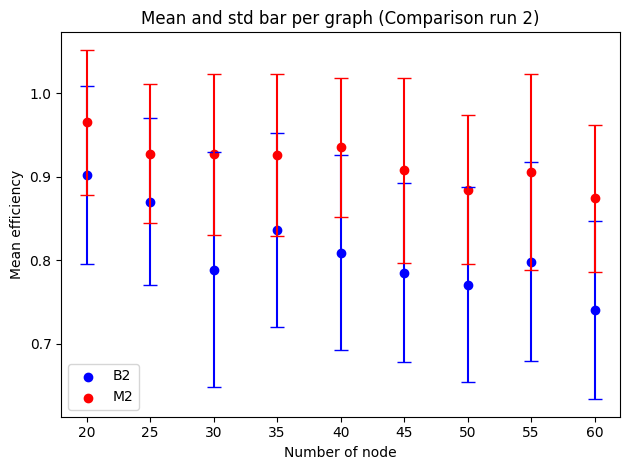

In [15]:
B2_data = comparison_run_B_2
M2_data = comparison_run_M_2

mean_B2 = np.mean(B2_data,axis=(1,2))
std_B2 = np.std(B2_data,axis=(1,2))

mean_M2 = np.mean(M2_data,axis=(1,2))
std_M2 = np.std(M2_data,axis=(1,2))

x_exp2 = np.linspace(20,60,9)
plt.scatter(x_exp2,mean_B2,marker = 'o',color ='blue',label = 'B2')
plt.errorbar(x_exp2,mean_B2,yerr=std_B2,fmt ='none',capsize=5,color='blue')

plt.scatter(x_exp2,mean_M2,marker = 'o',color ='red',label = 'M2')
plt.errorbar(x_exp2,mean_M2,yerr=std_M2,fmt ='none',capsize=5,color='red')

plt.xlabel("Number of node")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Comparison run 2)")
plt.tight_layout()
plt.legend()
plt.show()

#### Comparison run 3

In [17]:
comparison_run_B_3, comparison_run_M_3 = experiment_setup(no_graph = 30,min_node = 40,max_node = 40,no_correlation = 1, step_node = 1, no_sample = 10,temperature = 3)
np.save('comparison_run_B_3',comparison_run_B_3)
np.save('comparison_run_M_3',comparison_run_M_3)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19
Node 40,Graph 20
Node 40,Graph 21
Node 40,Graph 22
Node 40,Graph 23
Node 40,Graph 24
Node 40,Graph 25
Node 40,Graph 26
Node 40,Graph 27
Node 40,Graph 28
Node 40,Graph 29


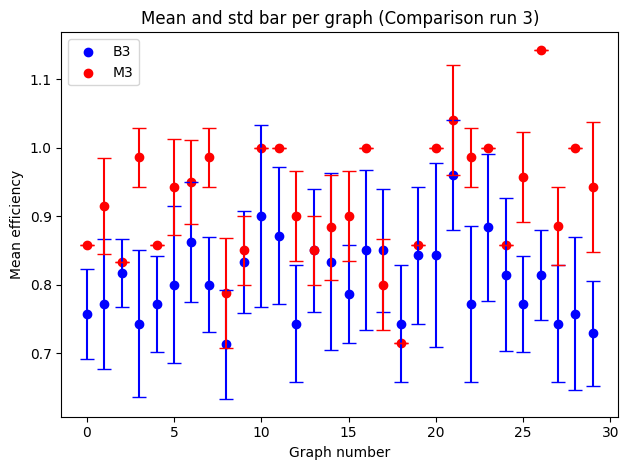

In [20]:
B3_data = comparison_run_B_3[0,:,:]
M3_data = comparison_run_M_3[0,:,:]

mean_B3 = np.mean(B3_data,axis=1)
std_B3 = np.std(B3_data,axis=1)

mean_M3 = np.mean(M3_data,axis=1)
std_M3 = np.std(M3_data,axis=1)

x_exp3 = np.arange(len(mean_B3))
plt.scatter(x_exp3,mean_B3,marker = 'o',color ='blue',label = 'B3')
plt.errorbar(x_exp3,mean_B3,yerr=std_B3,fmt ='none',capsize=5,color='blue')

plt.scatter(x_exp3,mean_M3,marker = 'o',color ='red',label = 'M3')
plt.errorbar(x_exp3,mean_M3,yerr=std_M3,fmt ='none',capsize=5,color='red')

plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Comparison run 3)")
plt.tight_layout()
plt.legend()
plt.show()

#### Comparison run 4

In [18]:
comparison_run_B_4, comparison_run_M_4 = experiment_setup(no_graph = 20,min_node = 40,max_node = 40, step_node = 1, no_sample = 10,temperature = 7)
np.save('comparison_run_B_4',comparison_run_B_4)
np.save('comparison_run_M_4',comparison_run_M_4)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19


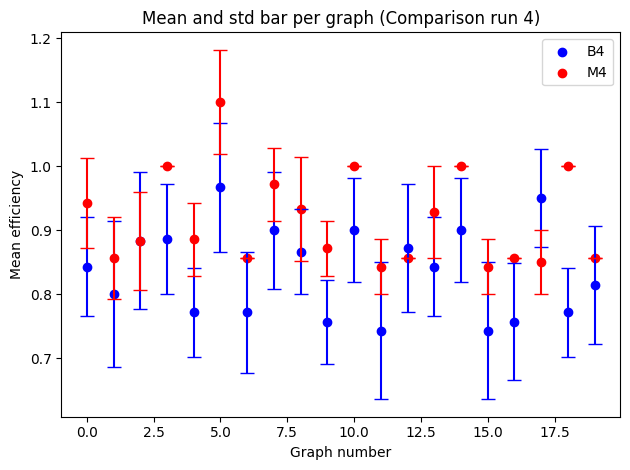

In [4]:
comparison_run_B_4 = np.load('data\comparison_run_B_4.npy')
comparison_run_M_4 = np.load('data\comparison_run_M_4.npy')
B4_data = comparison_run_B_4[0,:,:]
M4_data = comparison_run_M_4[0,:,:]

mean_B4 = np.mean(B4_data,axis=1)
std_B4 = np.std(B4_data,axis=1)

mean_M4 = np.mean(M4_data,axis=1)
std_M4 = np.std(M4_data,axis=1)

x_exp4 = np.arange(len(mean_B4))
plt.scatter(x_exp4,mean_B4,marker = 'o',color ='blue',label = 'B4')
plt.errorbar(x_exp4,mean_B4,yerr=std_B4,fmt ='none',capsize=5,color='blue')

plt.scatter(x_exp4,mean_M4,marker = 'o',color ='red',label = 'M4')
plt.errorbar(x_exp4,mean_M4,yerr=std_M4,fmt ='none',capsize=5,color='red')

plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Comparison run 4)")
plt.tight_layout()
plt.legend()
plt.show()

In [22]:
comparison_run_B_5, comparison_run_M_5 = experiment_setup(no_graph = 20,min_node = 40,max_node = 40, step_node = 1,no_correlation = 1, no_sample = 10,temperature = 7)
np.save('comparison_run_B_5',comparison_run_B_5)
np.save('comparison_run_M_5',comparison_run_M_5)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19


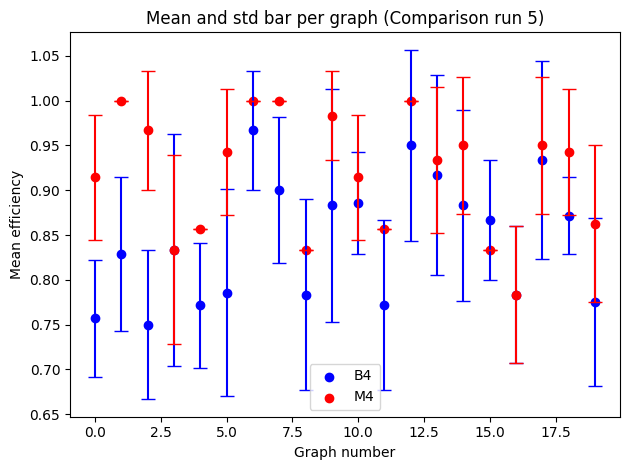

In [23]:
B5_data = comparison_run_B_5[0,:,:]
M5_data = comparison_run_M_5[0,:,:]

mean_B5 = np.mean(B5_data,axis=1)
std_B5 = np.std(B5_data,axis=1)

mean_M5 = np.mean(M5_data,axis=1)
std_M5 = np.std(M5_data,axis=1)

x_exp5 = np.arange(len(mean_B5))
plt.scatter(x_exp5,mean_B5,marker = 'o',color ='blue',label = 'B4')
plt.errorbar(x_exp5,mean_B5,yerr=std_B5,fmt ='none',capsize=5,color='blue')

plt.scatter(x_exp5,mean_M5,marker = 'o',color ='red',label = 'M4')
plt.errorbar(x_exp5,mean_M5,yerr=std_M5,fmt ='none',capsize=5,color='red')

plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Comparison run 5)")
plt.tight_layout()
plt.legend()
plt.show()